<h1> UK ROAD ACCIDENT ANALYSIS</h1>
<hr> 
Analyst: John Allen Bonggay 

In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
road_accidents = pd.read_csv('accident_data.csv')

In [3]:
date = road_accidents['Accident Date'] = pd.to_datetime(road_accidents['Accident Date'], dayfirst = True, errors = 'coerce')

In [4]:
road_accidents['Year'] = road_accidents['Accident Date'].dt.year
road_accidents['Month'] = road_accidents['Accident Date'].dt.month
road_accidents['Day'] = road_accidents['Accident Date'].dt.day
road_accidents['DayofWeek'] = road_accidents['Accident Date'].dt.dayofweek

In [5]:
road_accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayofWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


In [6]:
road_accidents["Accident_Severity"] = road_accidents["Accident_Severity"].astype('category')
road_accidents["Light_Conditions"] = road_accidents["Light_Conditions"].astype('category')
road_accidents["District_Area"] = road_accidents["District Area"].astype('category')
road_accidents["Road_Surface_Condtions"] = road_accidents["Road_Surface_Conditions"].astype('category')
road_accidents["Road_Type"] = road_accidents["Road_Type"].astype('category')
road_accidents["Urban_or_Rural_Area"] = road_accidents["Urban_or_Rural_Area"].astype('category')
road_accidents["Weather_Conditions"] = road_accidents["Weather_Conditions"].astype('category')
road_accidents["Vehicle_Type"] = road_accidents["Vehicle_Type"].astype('category')

<h2>1. Total Number Of Accidents In UK Ranging from year 2019 to 2022.</h2>

In [7]:
road_accidents['Index'].value_counts().sum()

np.int64(660679)

<h2>Insight</h2>
<p>The sum total of accidents sums up to 660679 cases.</p>

<h2>2. Difference Between Casualties of Multi-Vehicle and Single-Vehicle</h2>

In [23]:
casualties = road_accidents.groupby('Accident_Type')['Number_of_Casualties'].describe()

In [24]:
casualties

,count,mean,std,min,25%,50%,75%,max
Accident_Type,,,,,,,,
Multi Vehicle,459892.0,1.438294,0.898167,1.0,1.0,1.0,2.0,62.0
Single Vehicle,200787.0,1.170932,0.584175,1.0,1.0,1.0,1.0,68.0


<h3>Insight 2</h3>
<p>There's a huge gap between the casualties of Multi-Vehicles against Single-Vehicles, indicating the bigger the surface the larger the impact.</p>

In [ ]:
road_accidents['Accident_Type'] = np.where(
    road_accidents['Number_of_Vehicles'] == 1,
    'Single Vehicle',
    'Multi Vehicle'
)

casualty_counts = (
    road_accidents.groupby(['Accident_Type', 'Number_of_Casualties'])
    .size()
    .unstack(fill_value=0)
)

casualty_counts = casualty_counts.loc[:, casualty_counts.columns <= 8]


casualty_counts.T.plot(kind='bar', figsize=(10,6))

plt.title("Distribution of Number of Casualties per Accident")
plt.xlabel("Number of Casualties")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.legend(title="Accident Type")
plt.show()

<h3>Insight 3</h3>
<p>As the casualties grew in number, the larger the gap in between the two types of vehicles proving that the larger the vehicle the more damage it brought upon the vicinity of the area.</p>

<h2>3. Frequency of Accidents between Daytime and Nighttime.</h2>

In [ ]:
luminous = road_accidents[(road_accidents['Vehicle_Type'] == 'Car') & (road_accidents['Accident_Severity'] == 'Fatal')]
luminous = luminous.groupby('Light_Conditions').size().sort_values(ascending=False)
luminous

<h2>Insight 4</h2>
<p>In broad daylight more accidents occur than any time in the night.</p>

<h2>Insight 5</h2>
<p>There's a possibility that the roads in UK are well-litted during the nighttime resulting to lesser accidents, rather than broad daylight. We also need to consider the time of the day where the number of vehicles goes out for a ride ~possibly also indicating that there are less vehicles out there during the night.</p>

<h3> 4. Which districts recorded the most accidents?</h3>

In [ ]:
road_accidents['District Area'].value_counts()

<h2>Insight 6</h2>
<p>Birmingham District recorded the most accidents (13,491), significantly higher than the second and third districts which are Leeds (8,898) and Manchester (6,720).</p>

<h2>5. Road Accidents Between Days of the Week, Frequencies Between Lowest To Highest</h2>

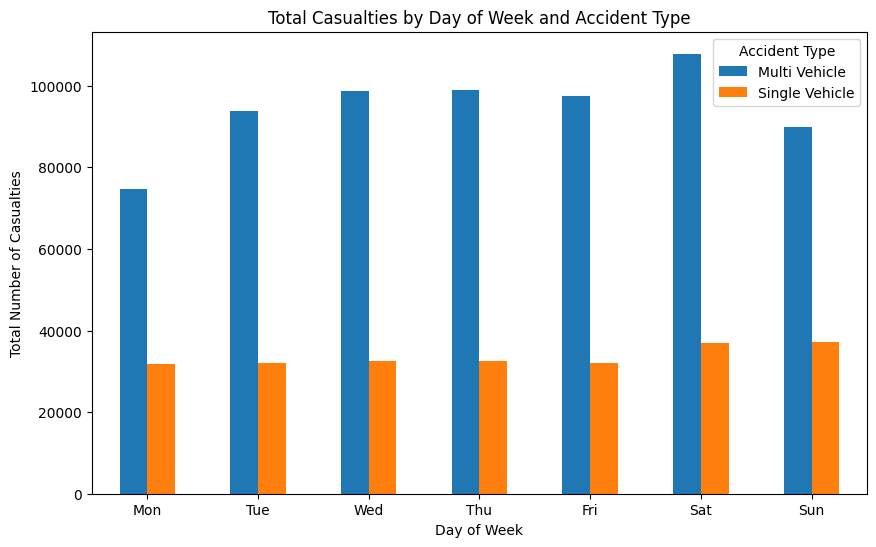

In [9]:
road_accidents['Accident Date'] = pd.to_datetime(road_accidents['Accident Date'], dayfirst=True, errors='coerce')
road_accidents['Day_of_Week'] = road_accidents['Accident Date'].dt.dayofweek

road_accidents['Accident_Type'] = np.where(
    road_accidents['Number_of_Vehicles'] == 1,
    'Single Vehicle',
    'Multi Vehicle'
)

casualties_by_day = road_accidents.groupby(['Day_of_Week', 'Accident_Type'])['Number_of_Casualties'].sum().unstack(fill_value=0)

day_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
casualties_by_day.index = casualties_by_day.index.map(lambda x: day_labels[x])


casualties_by_day.plot(kind='bar', figsize=(10,6))
plt.title("Total Casualties by Day of Week and Accident Type")
plt.xlabel("Day of Week")
plt.ylabel("Total Number of Casualties")
plt.xticks(rotation=0)
plt.legend(title="Accident Type")
plt.show()

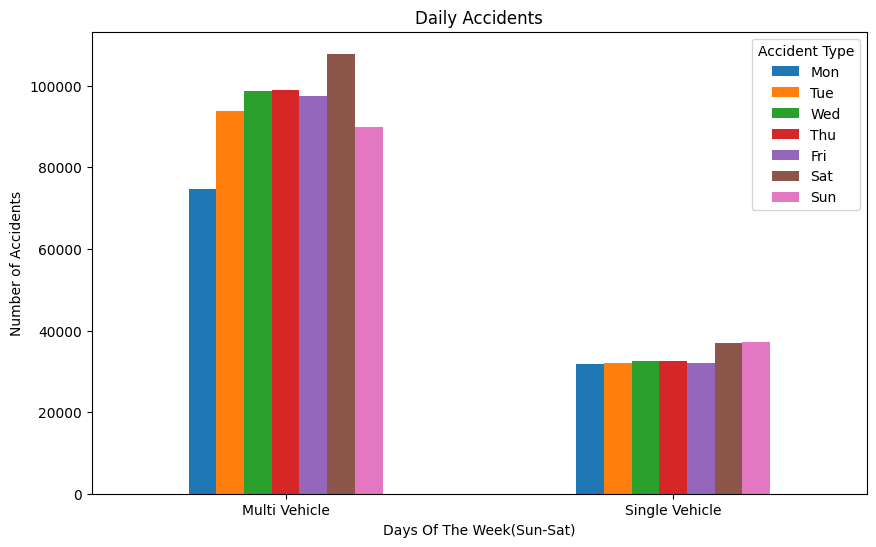

In [10]:
casualties_by_day.T.plot(kind='bar', figsize=(10,6))

plt.title("Daily Accidents")
plt.xlabel("Days Of The Week(Sun-Sat)")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.legend(title="Accident Type")
plt.show()

<h2>Insight 7</h2>
<p>The 4 Year Record(2019-2022) of accidents ties up in Saturday(107178) where it possess the most accidents between any days of the week and Monday(72680) as the lowest.</p>

<h2>Insight 8</h2>
<p>Friday is associated with end of school/work days indicating vehicles are active in the road which leads to why it has the highest accident for vehicles are everywhere.Though Su</p>

<h2>6. Casualties In The Days Of the Week</h2>

In [11]:
casualties = road_accidents.groupby('Accident_Type')['Number_of_Casualties'].describe()
casualties

,count,mean,std,min,25%,50%,75%,max
Accident_Type,,,,,,,,
Multi Vehicle,459892.0,1.438294,0.898167,1.0,1.0,1.0,2.0,62.0
Single Vehicle,200787.0,1.170932,0.584175,1.0,1.0,1.0,1.0,68.0


In [12]:
road_accidents['Accident Date'] = pd.to_datetime(road_accidents['Accident Date'], dayfirst=True, errors='coerce')
week = road_accidents['Day_of_Week'] = road_accidents['Accident Date'].dt.dayofweek
week.value_counts()

Accident Date
5    107178
2     99558
3     99511
4     97900
1     94550
6     89302
0     72680
Name: count, dtype: int64

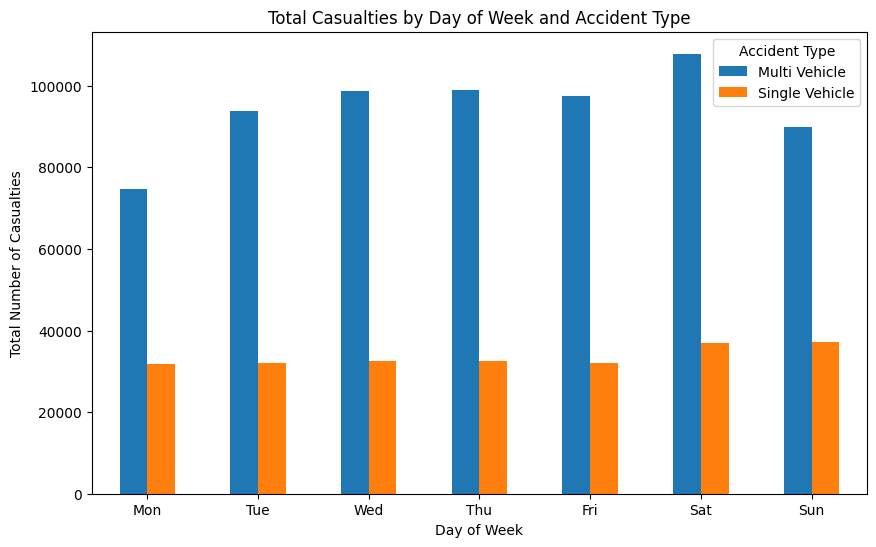

In [13]:
road_accidents['Accident Date'] = pd.to_datetime(road_accidents['Accident Date'], dayfirst=True, errors='coerce')
road_accidents['Day_of_Week'] = road_accidents['Accident Date'].dt.dayofweek

road_accidents['Accident_Type'] = np.where(
    road_accidents['Number_of_Vehicles'] == 1,
    'Single Vehicle',
    'Multi Vehicle'
)

casualties_by_day = road_accidents.groupby(['Day_of_Week', 'Accident_Type'])['Number_of_Casualties'].sum().unstack(fill_value=0)

day_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
casualties_by_day.index = casualties_by_day.index.map(lambda x: day_labels[x])


casualties_by_day.plot(kind='bar', figsize=(10,6))
plt.title("Total Casualties by Day of Week and Accident Type")
plt.xlabel("Day of Week")
plt.ylabel("Total Number of Casualties")
plt.xticks(rotation=0)
plt.legend(title="Accident Type")
plt.show()

<h2>Insight 9</h2>
<p>Multi-Vehicles has a huge gap between in terms of casualties than Single-Vehicles, any days in the week.</p>

<h2>Insight 10</h2>
<p>As said, Saturday has the most record of casualties in both Multi and Single Vehicles, Saturdays means a no_work day where people roams around to fix errands, joyful rides, it may ties up to this. </p>

<h2> 7. Which vehicles are most often involved in deadly accidents?</h2>

In [14]:
vehicle_type = road_accidents['Vehicle_Type'].value_counts()

In [15]:
vehicle_type

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h3>Insight 11</h3>
<p>Car has the most number of cases when it comes to fatal accidents</p>


<h3> 8. Which road type is most frequently associated with accidents?</h3>

In [16]:
road_accidents['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h3>Insight 12</h3>
<p>Dry roads has the highest cases of accidents which is 68% percent of the total number accidents that happen in the UK for over 4 years.</p>

<h2>9. Number Of Accidents In Rural and Urban Areas </h2>

In [27]:
accidents_area = road_accidents.groupby('Urban_or_Rural_Area').size()
accidents_area

Urban_or_Rural_Area
Rural          238990
Unallocated        11
Urban          421663
dtype: int64

<h3>Insight 13</h3>
<p>.There are 238990 cases in Rural, 421663 in Urban, and 11 unallocated cases. The road type seems to have a correlation with this situation.</p>

<h2>10. Correlating Road Types To Different Area Cases</h2>

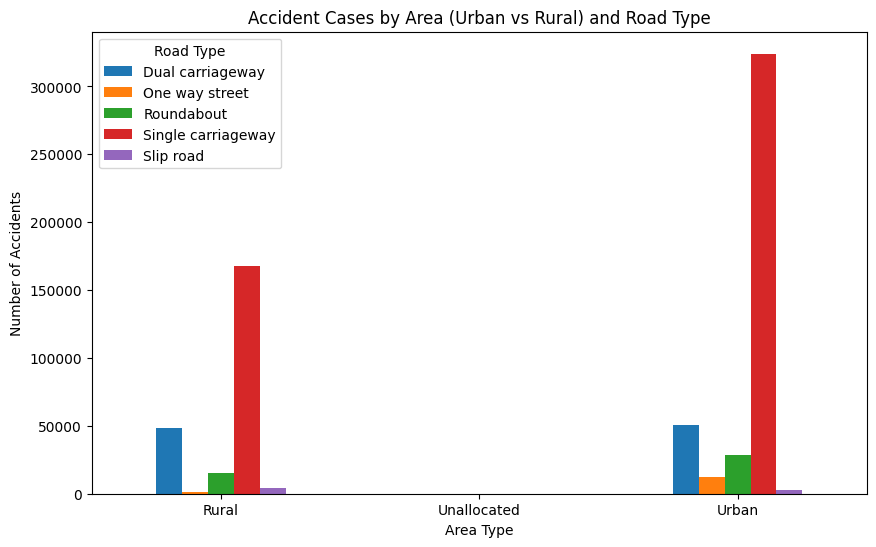

In [28]:
roadtype_distribution = (
    road_accidents.groupby(['Urban_or_Rural_Area', 'Road_Type'])
    .size()
    .unstack(fill_value=0)
)

roadtype_distribution.plot(kind='bar', figsize=(10,6))

plt.title("Accident Cases by Area (Urban vs Rural) and Road Type")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.legend(title="Road Type")
plt.show()

<h2>Insight 14</h2>
<p>Urban areas are dominated by single carriageway accidents.
Since cities have dense road networks and heavy traffic, the majority of reported accidents in urban areas tend to occur on single carriageways, often at intersections or congested stretches.</p>

<h2>Insight 15</h2>
<p>Friday is associated with end of school/work days indicating vehicles are active in the road which leads to why it has the highest accident for vehicles are everywhere.Though Su</p>

<h2>Insight 16</h2>
<p>Roundabout and junction accidents are more “urban-heavy.”
Road types like roundabouts or slip roads are more common in cities and suburbs, so accidents on these types are concentrated in urban data — whereas in rural data, these categories might appear much smaller or even negligible.</p>

<h2>11. Which Weather Condition Primarily Triggers Accidents?</h2>

In [29]:
road_accidents['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h3>Insight 17</h3>
<p>Even there are no weather condition to affect the driver, the most number of cases comes from Fine Weather(520885) which is 78% of the total accidents. </p>

<h3> 12. Which Year Brings a lot of accidents?</h3>

In [30]:
road_accidents['Accident Date'].dt.year.value_counts().sort_values(ascending=False)

Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h3>Insight 18.</h3>
<p>In the year 2019, a total of 182115 accidents occured, yet brought a little decline of accidents in the consecutive years ~even though Pandemic happened</p>

<h2>Who is the most gifted during Christmas?</h2>

In [31]:
christmas_gifts = road_accidents[road_accidents['Accident Date'].dt.month == 12]
christmas_gifts['District Area'].value_counts().sort_values(ascending=False)

District Area
Birmingham            1097
Leeds                  702
Manchester             513
Bradford               505
Sheffield              484
                      ... 
Western Isles           10
Orkney Islands          10
Berwick-upon-Tweed      10
Teesdale                 9
Clackmannanshire         5
Name: count, Length: 422, dtype: int64

<h3>Insight 19</h3>
<p>We can say that the Birminghan District celebrates a lot, there are over 1000 cases of accidents during the month of December.</p>

<h2>13.Monthly Tracking Of Accidents from 2019 to 2022</h2>

In [32]:
monthly_accidents = road_accidents.groupby(['Year', 'Month']).size().unstack()
monthly_accidents

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2019,15355,13253,15049,14125,15833,15528,15862,15044,15271,15528,16559,14708
2020,14133,14353,13494,13394,14336,14205,14630,13366,14432,15684,14770,13794
2021,13417,10950,13202,12715,13811,13936,14300,13415,13792,14834,15473,13709
2022,9967,10935,12341,11510,12372,12812,12653,12088,12960,13534,13622,9625


<h3>Insight 19</h3>
<p>Way back in 2019 the Pandemic started in the month of December, December 2019 also has the least number of accidents implying that Covid-19 greatly affected road accidents.</p>

<h3>Insight 20</h3>
<p>As the lockdown intensifies worldwide, there are lesser accidents in the year 2020-2021 than before 2019.</p>

<h3>Insight 21</h3>
<p>In the year 2022, the worldwide lockdown softens leading to people going out more often. Though in the year 2022, it has the least total accidents in UK.</p>

<h2>14. UK 2022, Car Accidents on Different Roads</h2>

In [33]:
acc_22 = road_accidents[road_accidents['Year'] == 2022]

car_accidents = acc_22[acc_22["Vehicle_Type"].str.contains("Car", case=False, na=False)]
car_road_types = car_accidents.groupby("Road_Type").size()
car_road_types

Road_Type
Dual carriageway      16954
One way street         2320
Roundabout             7858
Single carriageway    85781
Slip road              1210
dtype: int64

<h3>Insight 22</h3>
<p>In the year 2022, the Single Carriageway roads has the most recorded accidents summing up to 85781 or 75% of the total accidents.</p>

<h3>Insight 23</h3>
<P>Slip lane(1210) has the least number of cases, regarding this road type would explain it. Slip roads are roads that serves as shortcut straight to the main road, and this roads/lanes has always speed limit and not that busy.</P>

<h2>15.Analyzing The Severity of Accidents between 2019 and 2022.</h2>

In [34]:
severity_2019 = road_accidents[road_accidents['Year']==2019]['Accident_Severity'].value_counts(normalize=True) * 100
severity_2022 = road_accidents[road_accidents['Year']==2022]['Accident_Severity'].value_counts(normalize=True) * 100
compared = pd.DataFrame({"2019": severity_2019, "2022": severity_2022, "Change (%)": severity_2022 - severity_2019})
compared

,2019,2022,Change (%)
Accident_Severity,,,
Slight,85.154435,85.925675,0.771239
Serious,13.355297,13.001752,-0.353546
Fatal,1.490267,1.072574,-0.417694


<h3>Insight 24</h3>
<p>Most of the accidents are considered Slight filling up to 85% of the total accidents, 13% for Serious, and 1% for both 2019 and 2022 Accidents.</p>

<h3>Insight 25</h3>
<P>There's a small incline of change in Slight cases and a decline in Serious and Fatal Cases in the year 2022, which may indicate the improvement of road safety and awareness.</P>

In [52]:
road_accidents['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h2>16. Scotland Districts: Vehicle Risk Patterns</h2>

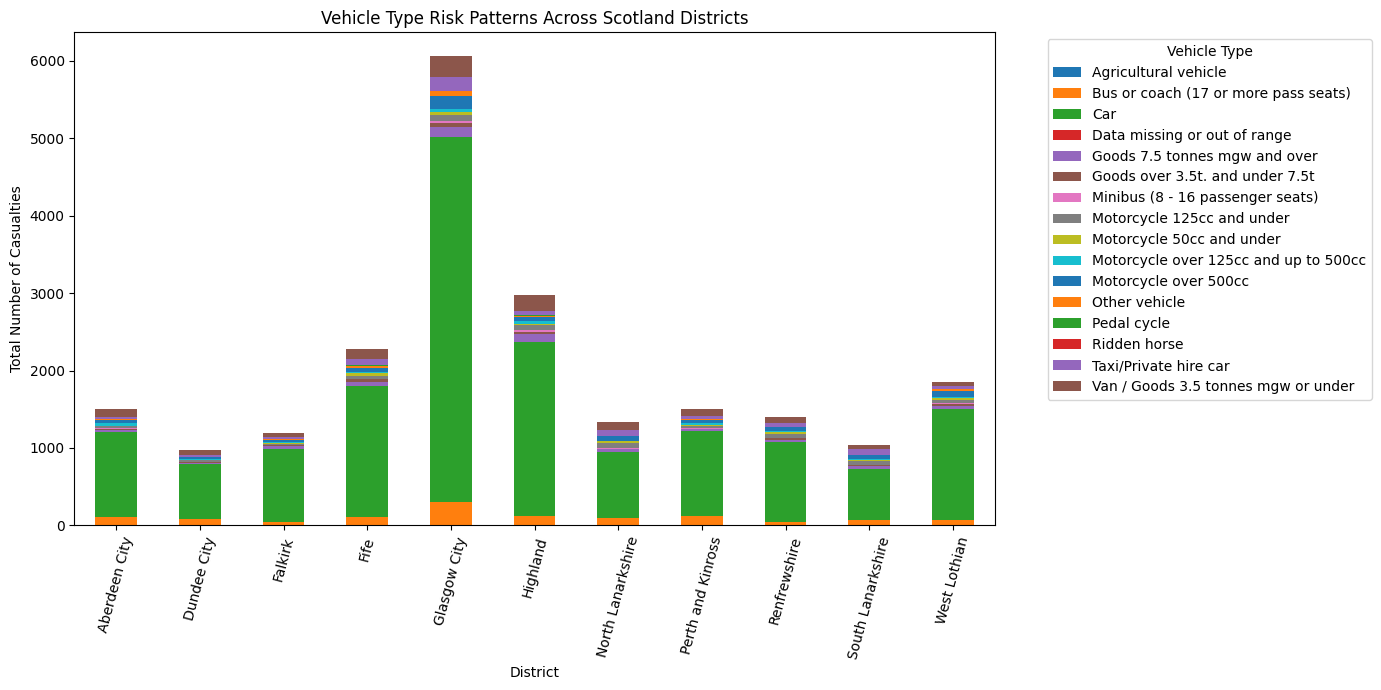

In [19]:
# Filter for Scotland districts
scotland_districts = [
    'Glasgow City', 'Edinburgh', 'Aberdeen City', 'Dundee City',
    'Highland', 'Fife', 'South Lanarkshire', 'North Lanarkshire',
    'Renfrewshire', 'West Lothian', 'Perth and Kinross', 'Falkirk'
]
scotland_data = road_accidents[road_accidents['District Area'].isin(scotland_districts)]

vehicle_risk = scotland_data.groupby(['District Area', 'Vehicle_Type'])['Number_of_Casualties'].sum().unstack(fill_value=0)

vehicle_risk.plot(kind='bar', stacked=True, figsize=(14,7))

plt.title("Vehicle Type Risk Patterns Across Scotland Districts")
plt.xlabel("District")
plt.ylabel("Total Number of Casualties")
plt.xticks(rotation=75)
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<h3>Here Is A Data Analization On What Is The Riskiest Vehicle In Scotland District!</h3>

<h3>Insight 26</h3>
<p>Motorcycles are dangerous in rural districts like Highland and Fife, where single-vehicle crashes often result in severe casualties.</p>

<h3>Insight 27</h3> 
<p>Cars dominate the casualty numbers in major urban centers such as Glasgow and Edinburgh, largely due to high traffic density, multi-vehicle collisions and those districts seerve as central hubs in Scotland.</p> 

<h3>Insight 28</h3> 
<p>Heavy vehicles are a significant risk in transit corridors like South Lanarkshire and Fife, highlighting the need for stricter speed and load enforcement which is a must for rural areas usually has low personnel or resources for this kind.</p> 

<h3>Insight 29</h3> 
<p>Bus-related casualties cluster in cities like Glasgow, Edinburgh, and Dundee, where pedestrian interaction and frequent bus operations increase risks.</p> 

<h3>Insight 30</h3> 
<p>Each district has a unique risk profile: urban centers show car and bus accidents, while rural areas are dominated by motorcycles, requiring district-specific enforcement strategies.</p> 

<h3>Insight 31</h3> 
<p>Severity of accidents does not always correlate with frequency; rural motorcycle accidents in Highland, though fewer, are far deadlier compared to urban car crashes.</p>



<h2>SNS Practice</h2>

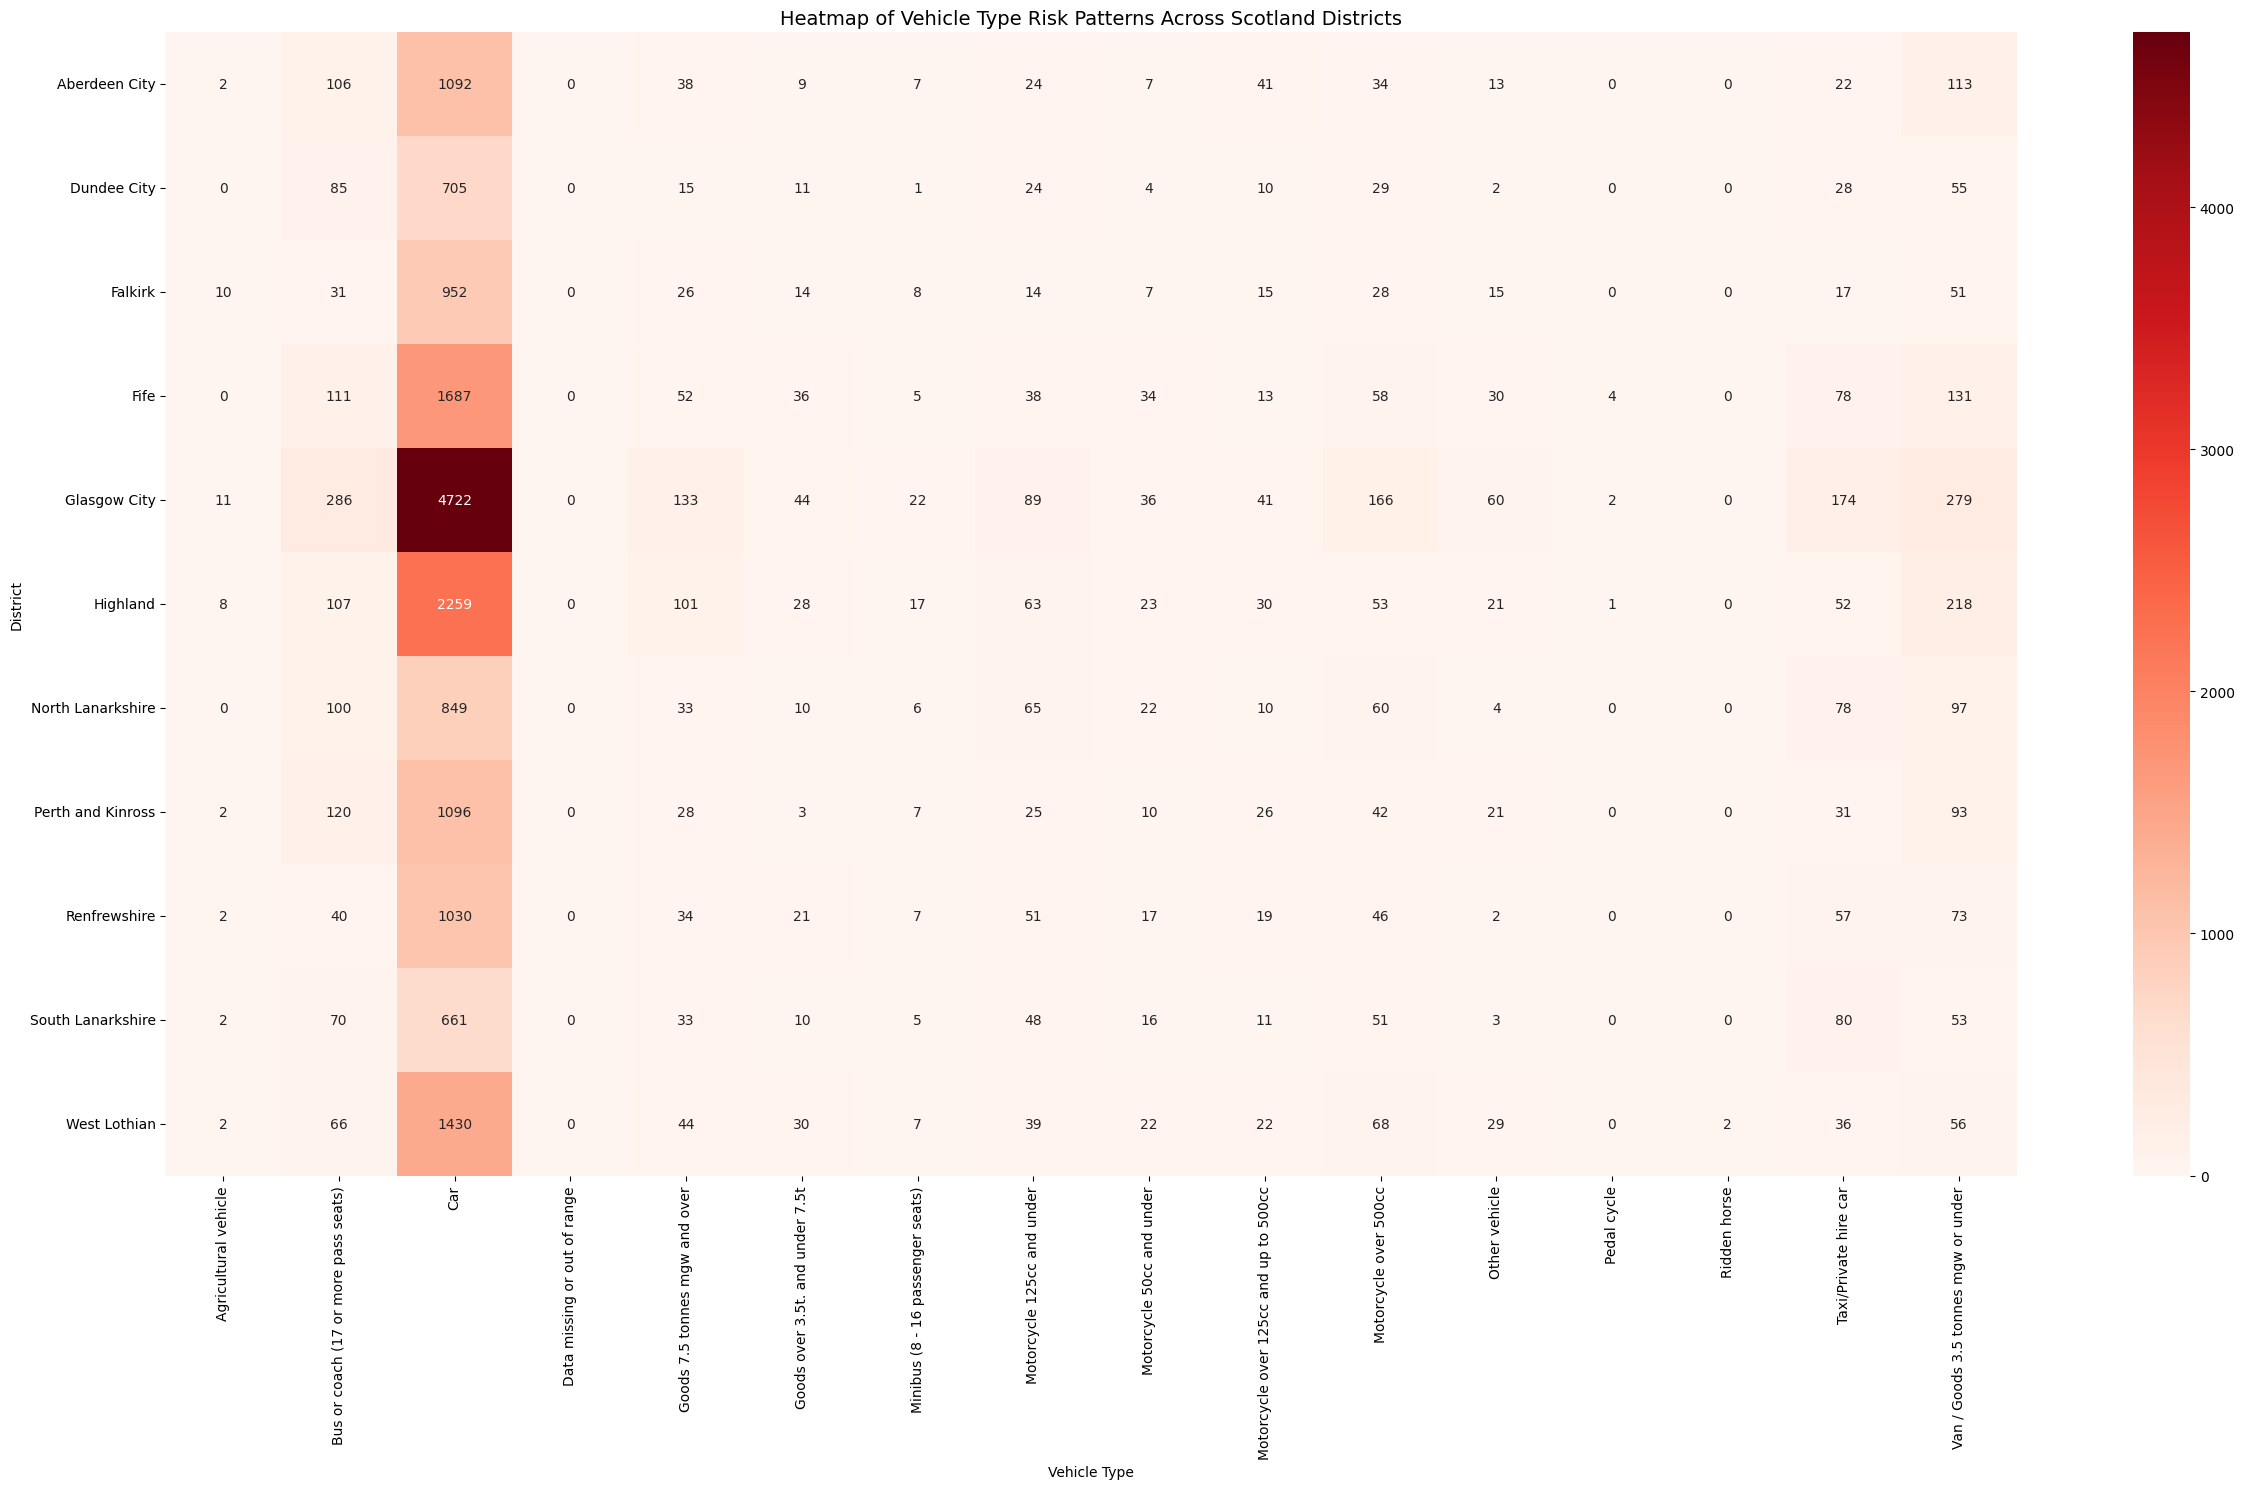

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

scotland_districts = [
    'Glasgow City', 'Edinburgh', 'Aberdeen City', 'Dundee City',
    'Highland', 'Fife', 'South Lanarkshire', 'North Lanarkshire',
    'Renfrewshire', 'West Lothian', 'Perth and Kinross', 'Falkirk'
]
scotland_data = road_accidents[road_accidents['District Area'].isin(scotland_districts)]

vehicle_risk = scotland_data.groupby(['District Area', 'Vehicle_Type'])['Number_of_Casualties'].sum().unstack(fill_value=0)

plt.figure(figsize=(25,15))
sns.heatmap(vehicle_risk, annot=True, fmt="d", cmap="Reds")

plt.title("Heatmap of Vehicle Type Risk Patterns Across Scotland Districts", fontsize=14)
plt.xlabel("Vehicle Type")
plt.ylabel("District")
plt.tight_layout()
plt.show()
